## Exploratory Data Analysis for the KilterGAN Dataset

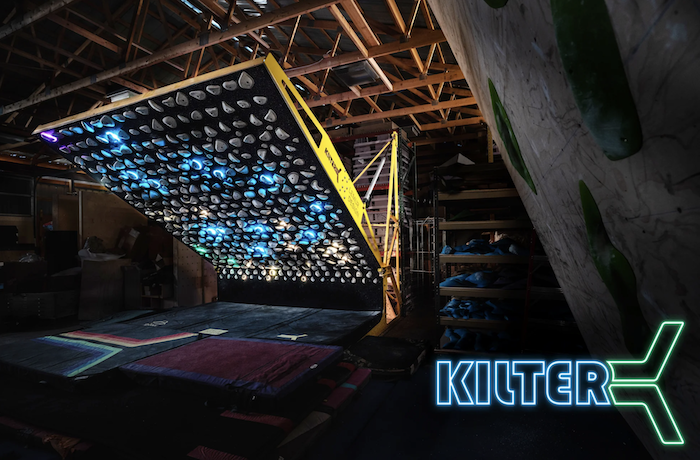

*Kilter boards allow for a data-centric approach to training for rock climbing*

Exploratory Data Analysis

The objective of this notebook is to explore the data that will be used to create a GAN for kilter board climbs. The dataset is split into two categories, VEasy, which has climbs from V1-V3, and VDifficult, which has climbs from V4-V6.

---

*Matthew Acs and Richard Acs*

In [1]:
import requests
import zipfile
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import plotly.express as px
import pandas as pd

# Load Data
---
The first step is to load the data from the KilterGAN GitHub repository

In [2]:
# Define the URLs of the GitHub repository zip files
urls = {
    "VDifficult": "https://github.com/matthewaaa123/KilterGAN/raw/main/VDifficult.zip",
    "VEasy": "https://github.com/matthewaaa123/KilterGAN/raw/main/VEasy.zip"
}

# Directory to save and extract the zip files
base_dir = 'KilterGAN/'

# Create the base directory if it doesn't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Function to download and unzip files
def download_and_unzip(name, url):
    zip_file_path = os.path.join(base_dir, f"{name}.zip")
    extraction_dir = os.path.join(base_dir, name)

    # Download the zip file
    response = requests.get(url)
    with open(zip_file_path, 'wb') as file:
        file.write(response.content)
    print(f"Downloaded {zip_file_path}")

    # Create the extraction directory if it doesn't exist
    if not os.path.exists(extraction_dir):
        os.makedirs(extraction_dir)

    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_dir)
    print(f"Extracted to {extraction_dir}")

    # List the files in the extraction directory
    extracted_files = os.listdir(extraction_dir)
    print(f"Extracted files in {name}:", extracted_files)

# Download and unzip each file
for name, url in urls.items():
    download_and_unzip(name, url)


Downloaded KilterGAN/VDifficult.zip
Extracted to KilterGAN/VDifficult
Extracted files in VDifficult: ['VDifficult', '__MACOSX']
Downloaded KilterGAN/VEasy.zip
Extracted to KilterGAN/VEasy
Extracted files in VEasy: ['VEasy', '__MACOSX']


In [3]:
# Base directories
base_dir = '/content/KilterGAN/'
vdifficult_dir = os.path.join(base_dir, 'VDifficult/VDifficult')
veasy_dir = os.path.join(base_dir, 'VEasy/VEasy')

# Function to get image file paths
def get_image_file_paths(directory):
    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.gif']
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if os.path.splitext(file)[1].lower() in image_extensions:
                image_files.append(os.path.join(root, file))
    return image_files

# Get image file paths for each difficulty level
veasy_levels = ['V1', 'V2', 'V3']
vdifficult_levels = ['V4', 'V5', 'V6']

vdifficult_images = {level: get_image_file_paths(os.path.join(vdifficult_dir, level)) for level in vdifficult_levels}
veasy_images = {level: get_image_file_paths(os.path.join(veasy_dir, level)) for level in veasy_levels}

# Exploratory Data Analysis
---

The next step is to explore the data to get a better understanding before training the KilterGAN model

---

The code below prints the image sizes for each class

---

In [4]:
# Function to print image size for one image
def print_image_size(image_paths, level):
    if image_paths:
        image_path = image_paths[0]  # Select the first image
        with Image.open(image_path) as img:
            print(f"Size of one image in {level}: {img.size}")
    else:
        print(f"No images found in {level}")

# Print image size for one image from each easy and difficult level
for level, images in veasy_images.items():
    print_image_size(images, level)

for level, images in vdifficult_images.items():
    print_image_size(images, level)

Size of one image in V1: (128, 128)
Size of one image in V2: (128, 128)
Size of one image in V3: (128, 128)
Size of one image in V4: (128, 128)
Size of one image in V5: (128, 128)
Size of one image in V6: (128, 128)


---

The code below prints the sample images for each class

---

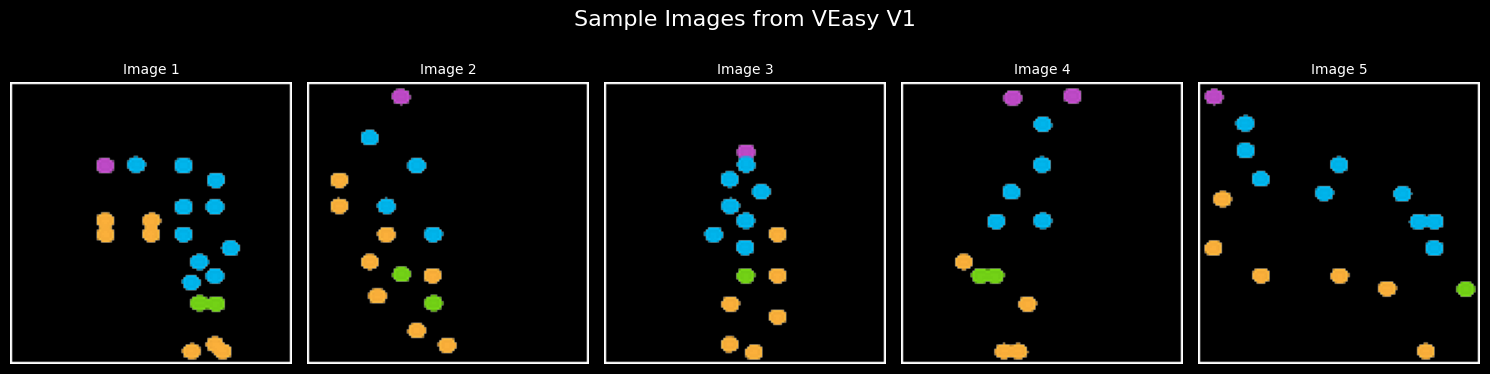

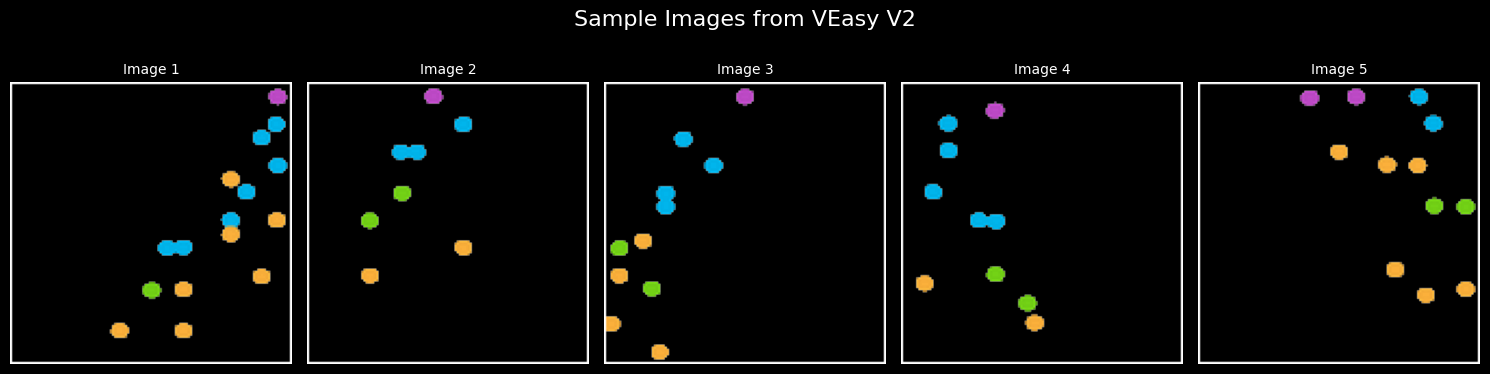

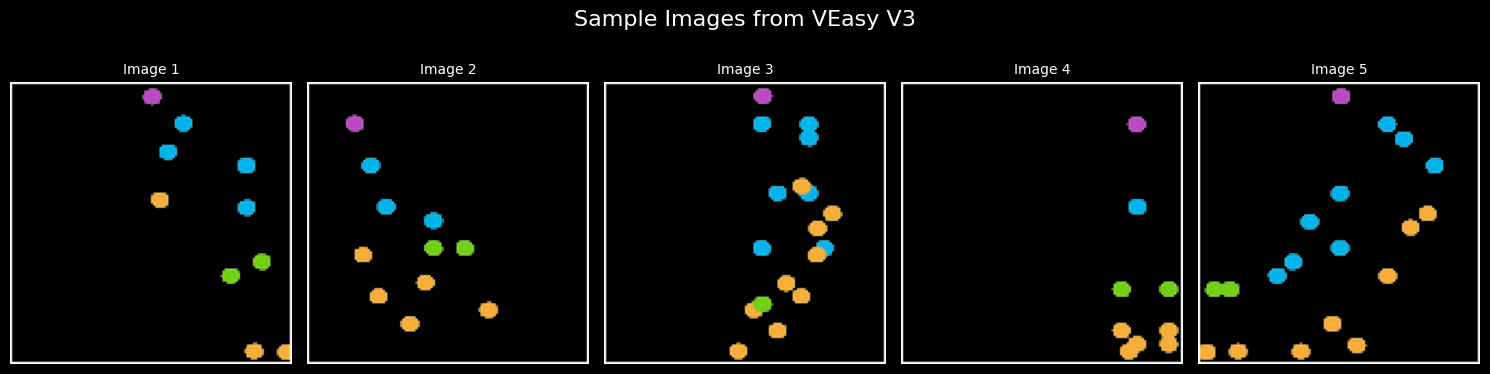

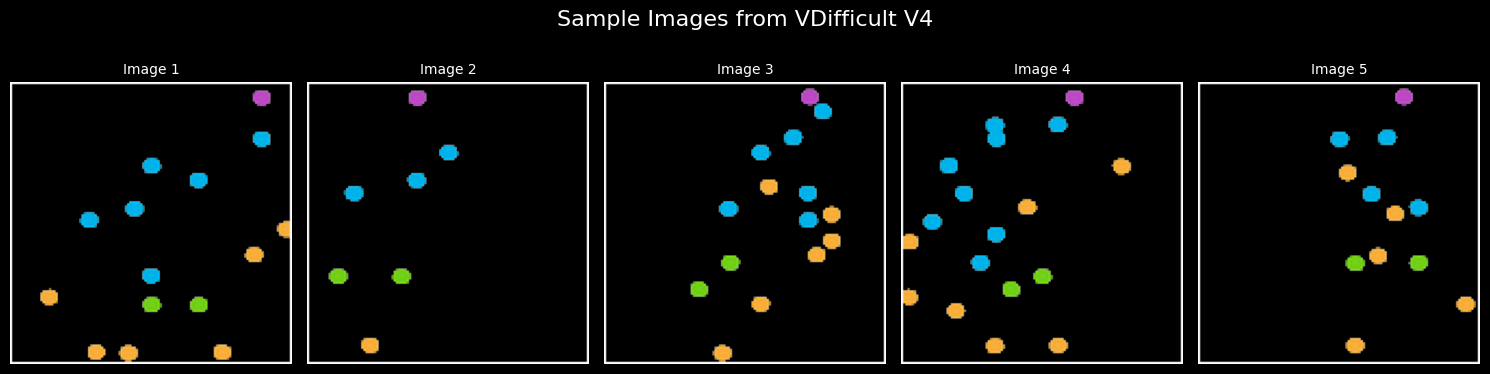

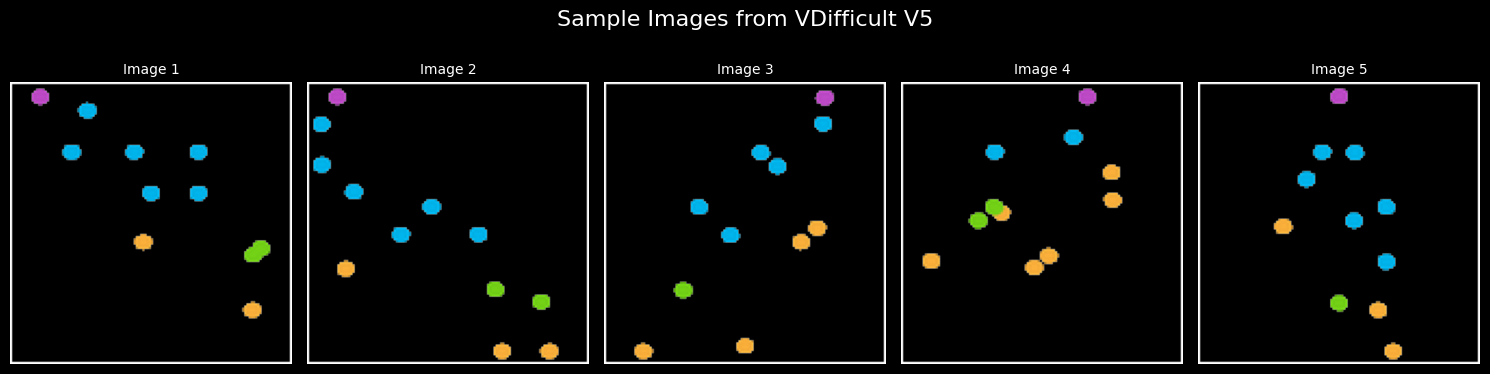

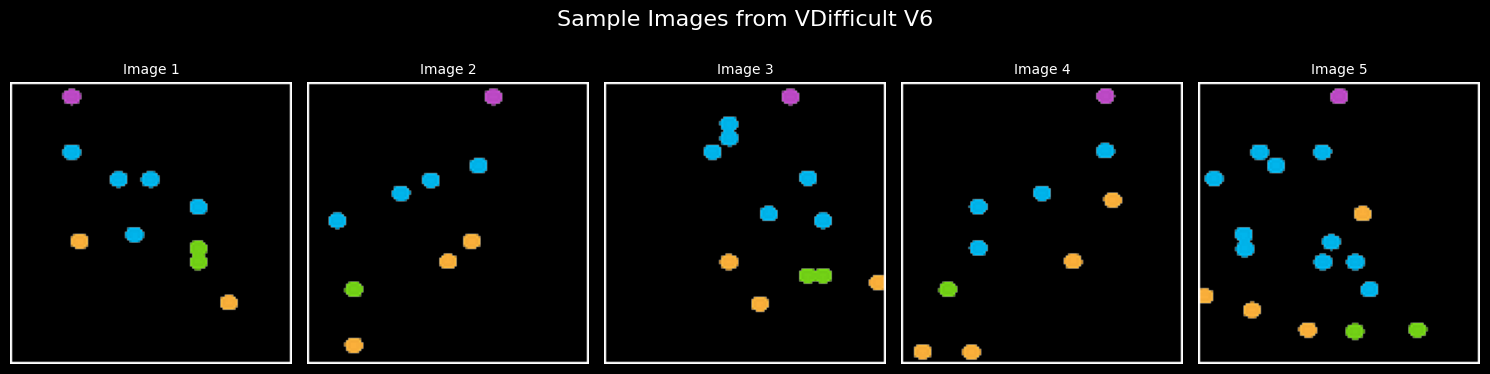

In [5]:
# Function to display sample images
def display_sample_images(image_files, title, n=5):
    plt.figure(figsize=(15, 4), facecolor='black')  # Set background color to black
    for i in range(n):
        img = Image.open(image_files[i])
        img_with_border = ImageOps.expand(img, border=1, fill='white')  # Add white border
        ax = plt.subplot(1, n, i+1, facecolor='black')  # Set subplot background color to black
        plt.imshow(img_with_border)
        plt.axis('off')  # Remove axes for a cleaner look
        plt.title(f"Image {i+1}", fontsize=10, color='white')  # Add a title for each subplot with white color
    plt.suptitle(title, fontsize=16, color='white')  # Set the title color to white
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
    plt.show()
    print()

# Display sample images from each difficulty level
for level, files in veasy_images.items():
    display_sample_images(files, f"Sample Images from VEasy {level}")

for level, files in vdifficult_images.items():
    display_sample_images(files, f"Sample Images from VDifficult {level}")


---

The code below prints the number of images for each class

---

In [6]:
# Count the number of images in each class
image_counts = {level: len(files) for level, files in {**veasy_images, **vdifficult_images}.items()}

print(image_counts)

{'V1': 989, 'V2': 997, 'V3': 1001, 'V4': 994, 'V5': 1024, 'V6': 994}


---

The code below creates a data count histogram

---

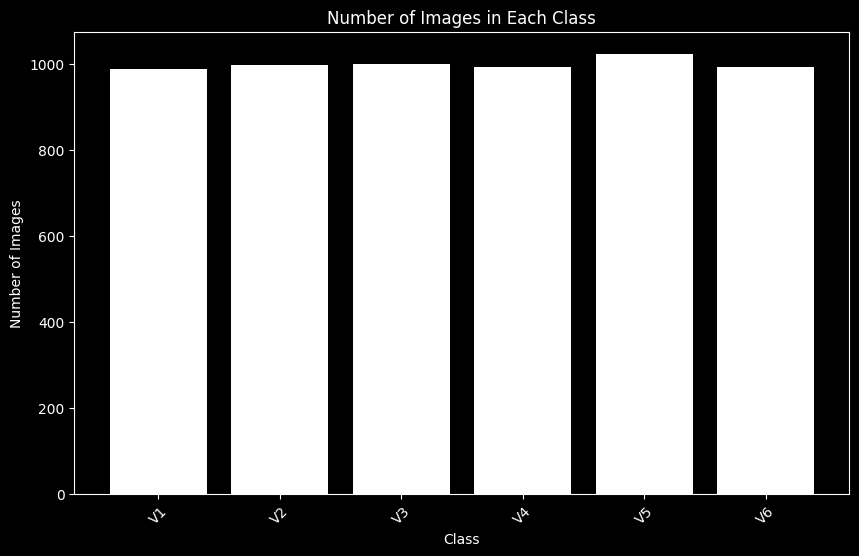

In [7]:
# Create a histogram in dark mode
plt.style.use('dark_background')  # Set the background style to dark
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='white')  # Use a color that contrasts well with dark background
plt.xlabel('Class', color='white')  # Set label color to white
plt.ylabel('Number of Images', color='white')  # Set label color to white
plt.title('Number of Images in Each Class', color='white')  # Set title color to white
plt.xticks(rotation=45, color='white')  # Set x-tick labels color to white
plt.yticks(color='white')  # Set y-tick labels color to white
plt.show()

---

The code below creates an average image for each class

---

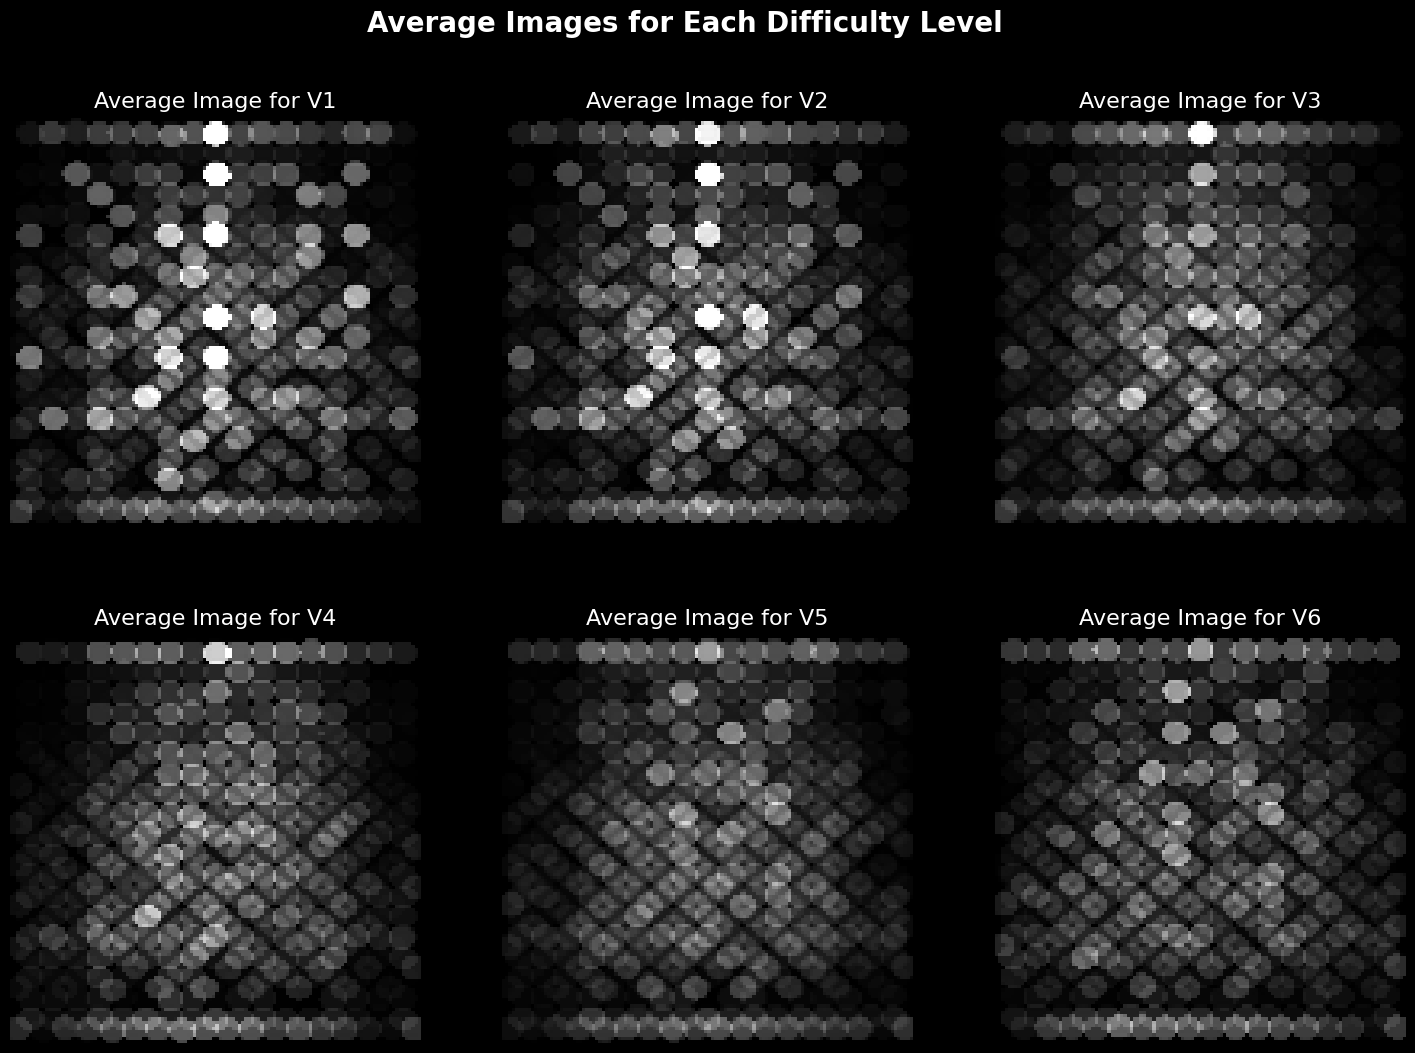

In [8]:
# Function to calculate average image for a list of image paths
def calculate_average_image(image_paths):
    avg_image = None
    count = len(image_paths)

    for image_path in image_paths:
        with Image.open(image_path) as img:
            np_img = np.array(img, dtype=np.float32)

            if avg_image is None:
                avg_image = np_img
            else:
                avg_image += np_img

    avg_image /= count
    avg_image *= 5
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)
    return Image.fromarray(avg_image)

# Get image file paths for each difficulty level
veasy_levels = ['V1', 'V2', 'V3']
vdifficult_levels = ['V4', 'V5', 'V6']

vdifficult_images = {level: get_image_file_paths(os.path.join(vdifficult_dir, level)) for level in vdifficult_levels}
veasy_images = {level: get_image_file_paths(os.path.join(veasy_dir, level)) for level in veasy_levels}

# Calculate average images for each class
average_images = {}
for level, files in {**veasy_images, **vdifficult_images}.items():
    average_images[level] = calculate_average_image(files)

# Display the average images
plt.figure(figsize=(18, 12))
for i, (level, avg_image) in enumerate(average_images.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(avg_image)
    plt.title(f'Average Image for {level}', fontsize=16)
    plt.axis('off')
plt.suptitle('Average Images for Each Difficulty Level', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

---

The code below visualizes the data using PCA

---

In [9]:
# Function to load images and convert them to flattened arrays
def load_images(image_paths):
    images = []
    for image_path in image_paths:
        try:
            with Image.open(image_path) as img:
                img = img.convert('RGB')
                img = img.resize((64, 64))  # Resize images to a consistent size
                images.append(np.array(img).flatten())
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    return np.array(images)

# Load images and create labels
all_images = []
labels = []

for level, files in veasy_images.items():
    images = load_images(files)
    all_images.append(images)
    labels.extend([level] * len(images))

for level, files in vdifficult_images.items():
    images = load_images(files)
    all_images.append(images)
    labels.extend([level] * len(images))

if all_images:
    all_images = np.vstack(all_images)
else:
    print("No images loaded. Please check the directories and image files.")
    all_images = np.array([])  # Empty array to avoid further errors

# Verify loaded images
print(f"Total images loaded: {all_images.shape[0]}")
if all_images.shape[0] > 0:
    print(f"Each image has {all_images.shape[1]} features")

# Apply PCA to reduce dimensions to 3
if all_images.shape[0] > 0:
    pca = KernelPCA(n_components=3, kernel='poly')
    pca_result = pca.fit_transform(all_images)

    # Create a DataFrame for plotting
    df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
    df['VGrade'] = labels

    # Plot 3D PCA
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='VGrade', title='3D PCA of VGrades')
    fig.update_layout(template='plotly_dark')
    fig.show()
else:
    print("No valid images to perform PCA.")


Total images loaded: 5999
Each image has 12288 features


# References
-----

Image Credit: https://settercloset.com/pages/the-kilter-board